### №1 Section for importing libraries and reading data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise
from scipy import ndimage
from scipy import signal

colors = ['b', 'g', 'r']
markers = ['s', '*', 'o']
work_dir_path = os.path.join(os.getcwd(), 'bin_data')
spectra_path = os.path.join(work_dir_path, 'data.npy')
labels_path = os.path.join(work_dir_path, 'labels.npy')
spectra = np.load(spectra_path)
labels = np.load(labels_path)

In [2]:
### №2 Section for filtering data and vizualization data

In [3]:
def ou_kernel(X, gamma=None, lambda_p=None, tau_p=None):

    if gamma is None:
        gamma = 1.0 / np.size(X)
    if lambda_p is None:
        lambda_p = 0.1
    if tau_p is None:
        tau_p = 0.1        
    K = (X*np.exp(-1.0*lambda_p*(tau_p)))**2
    K *= 1.0*gamma
    np.exp(K)  # exponentiate K in-place
    return K * np.sqrt(gamma)

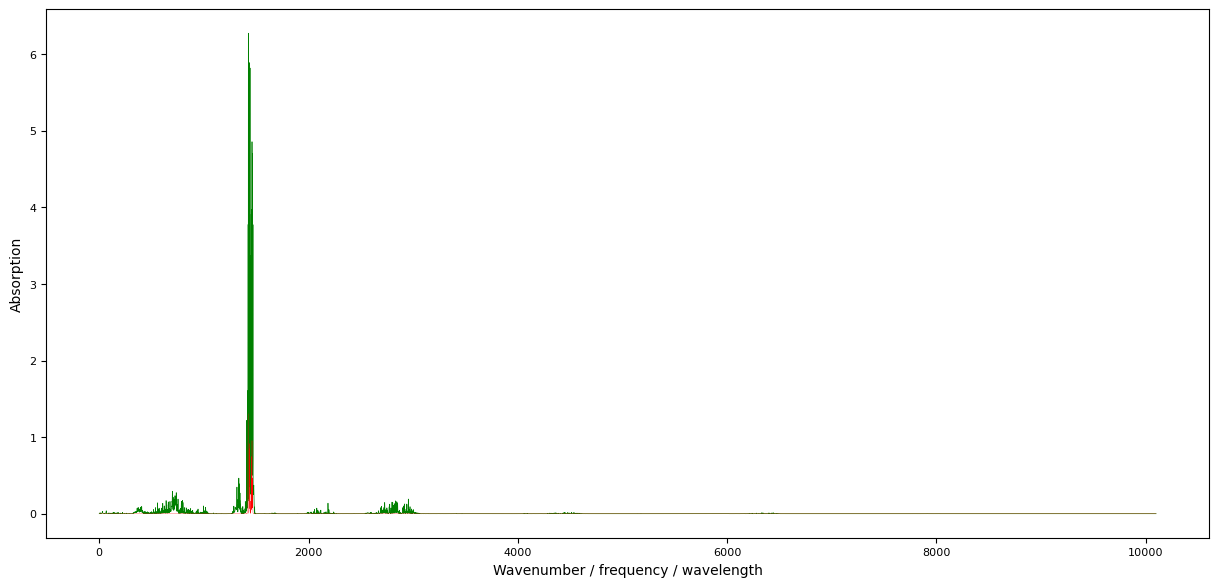

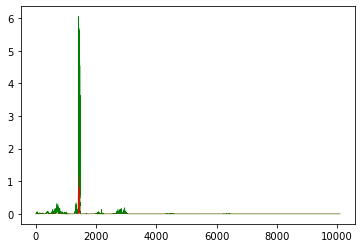

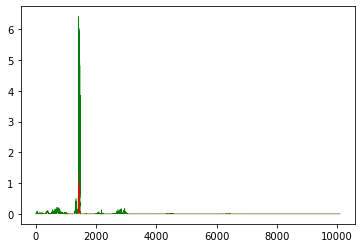

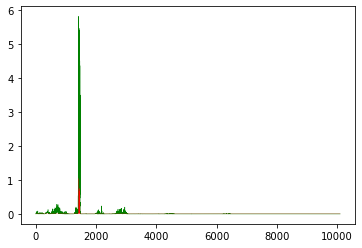

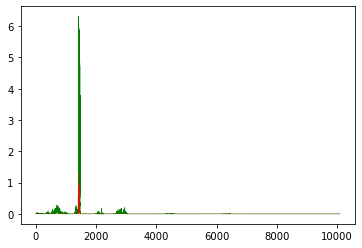

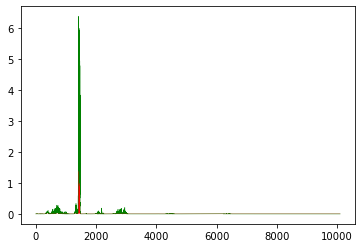

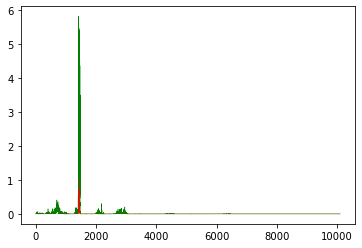

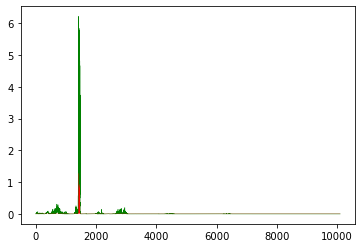

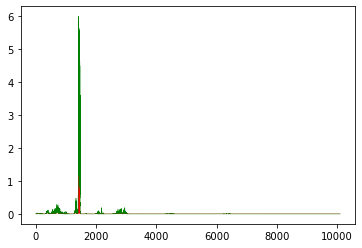

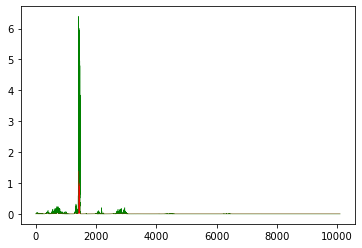

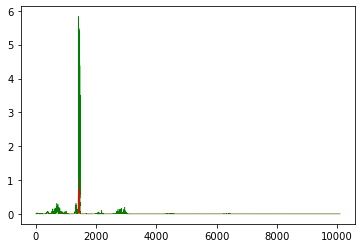

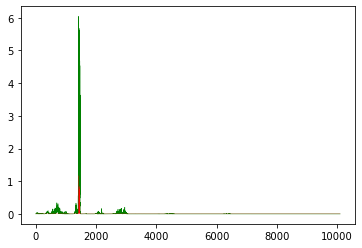

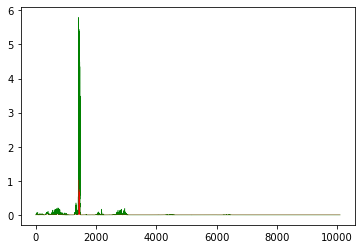

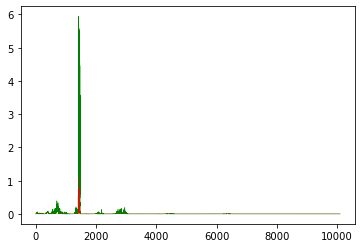

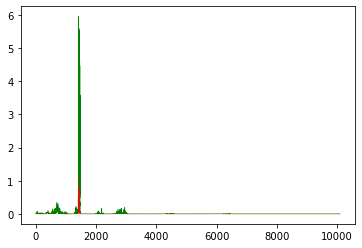

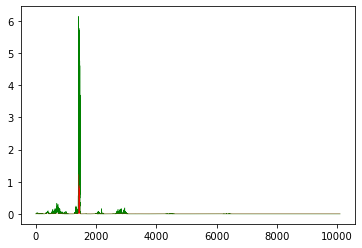

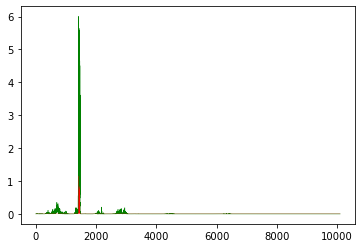

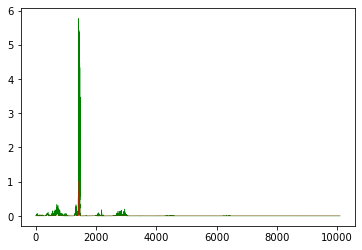

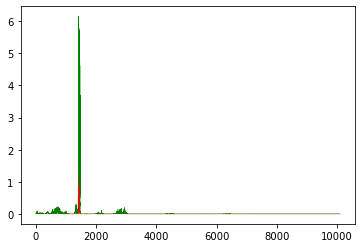

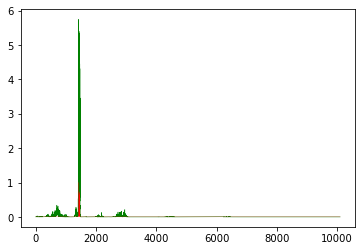

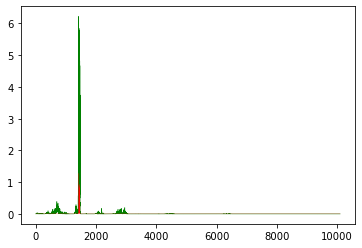

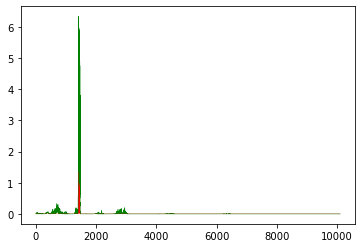

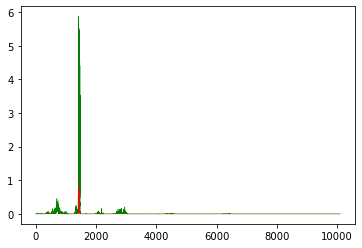

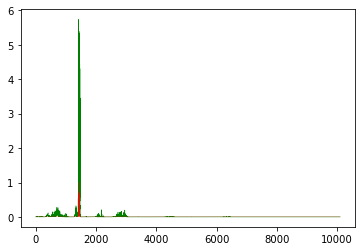

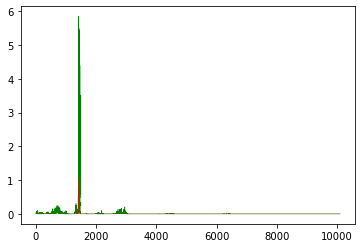

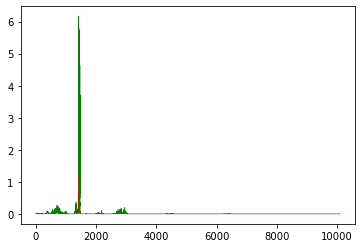

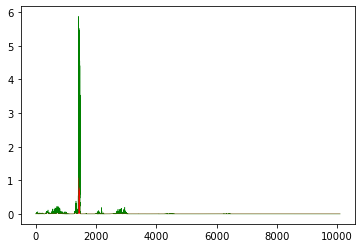

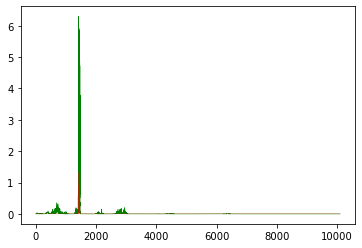

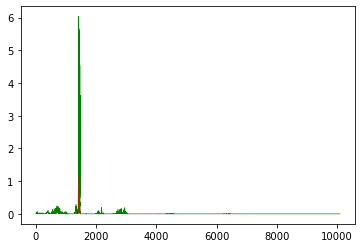

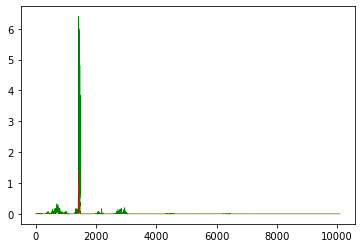

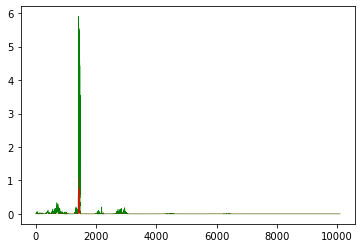

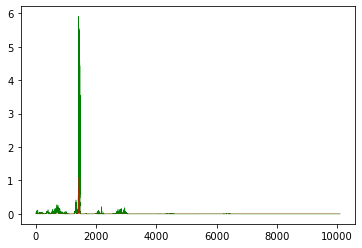

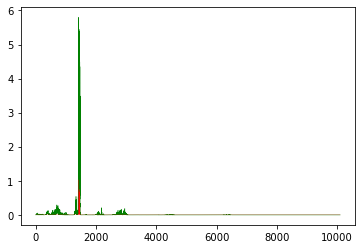

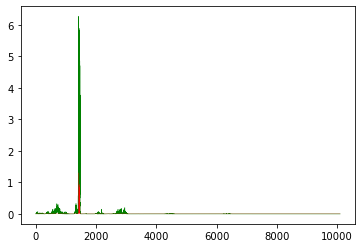

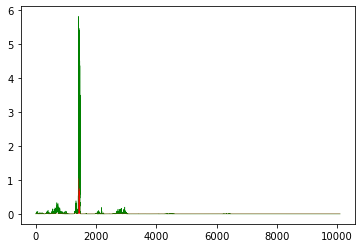

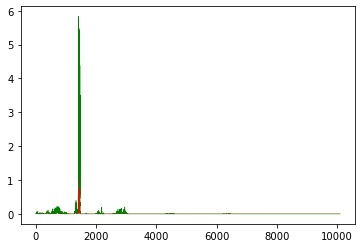

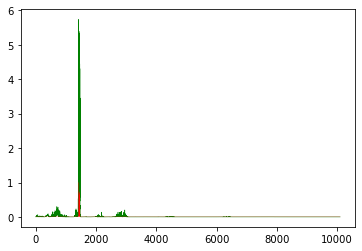

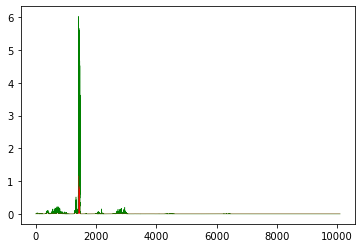

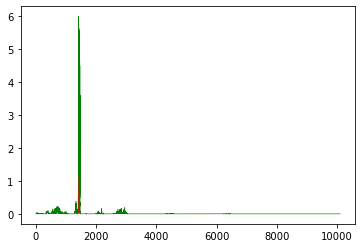

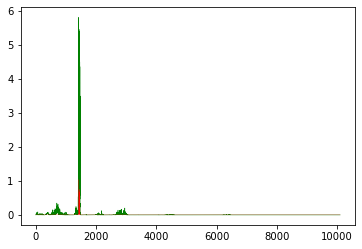

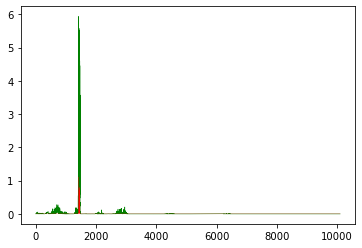

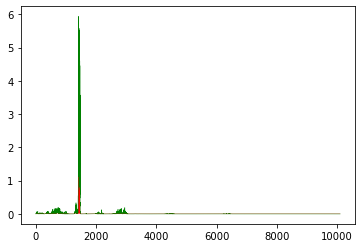

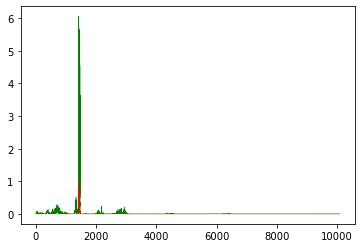

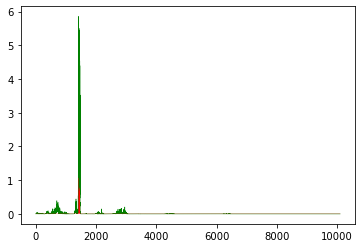

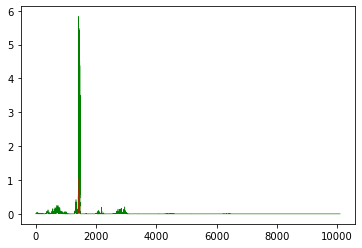

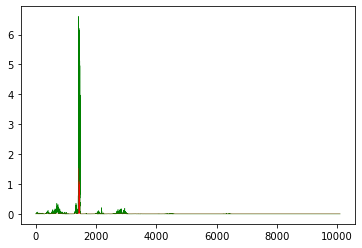

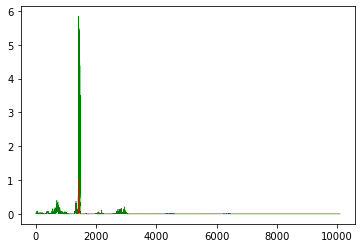

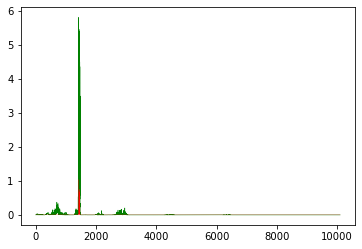

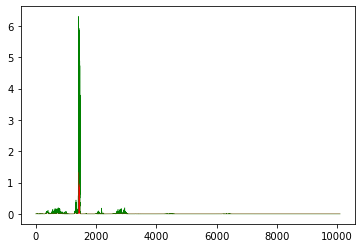

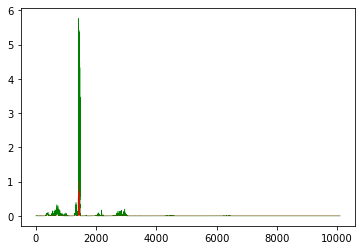

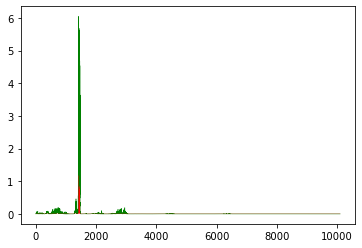

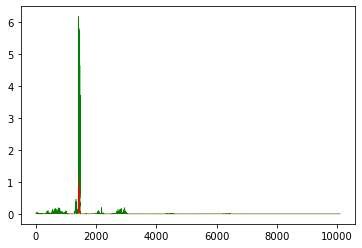

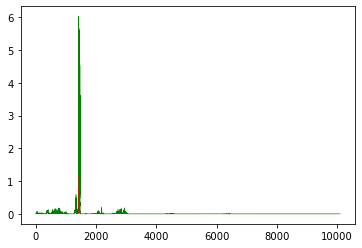

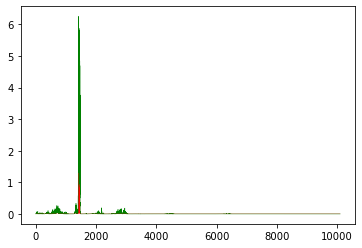

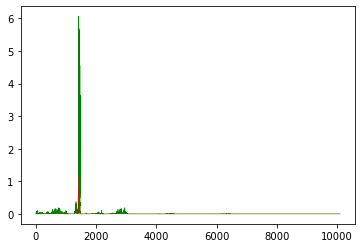

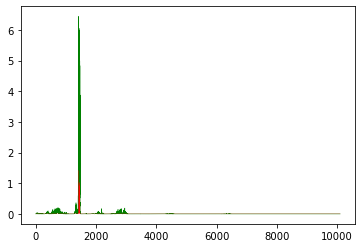

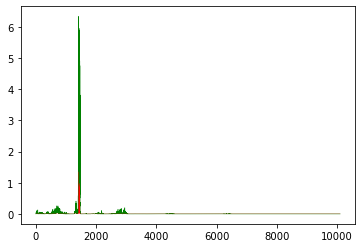

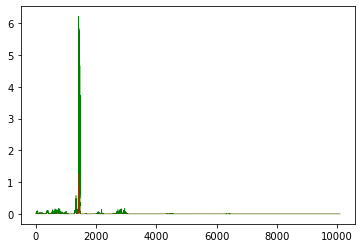

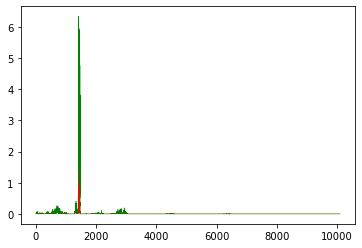

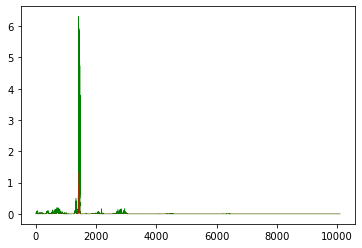

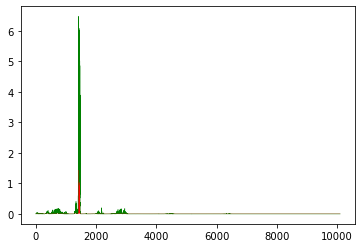

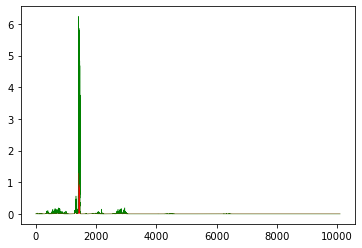

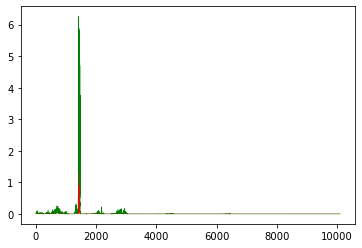

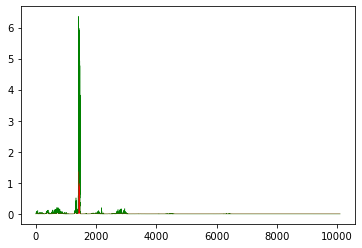

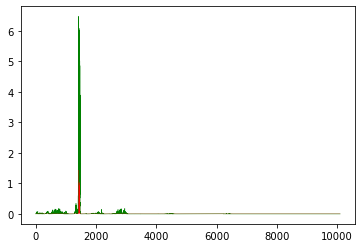

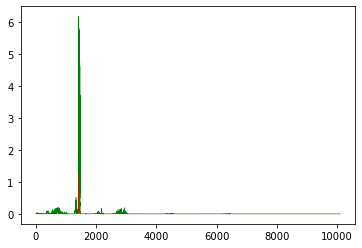

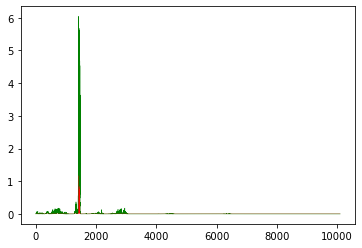

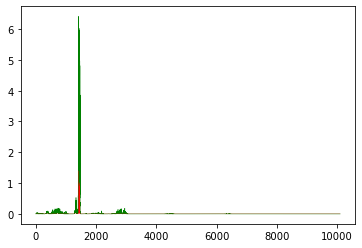

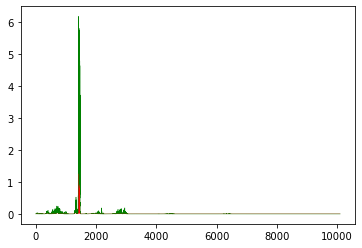

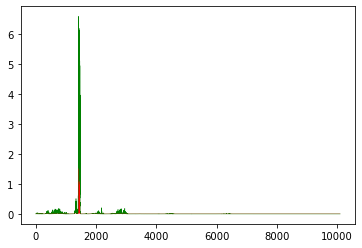

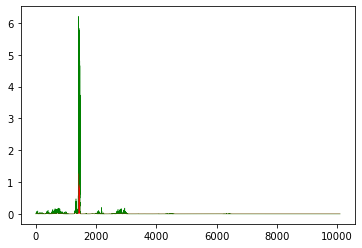

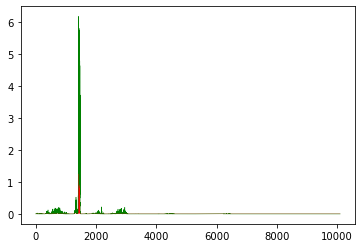

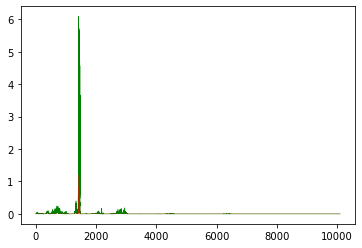

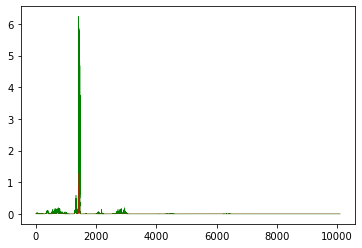

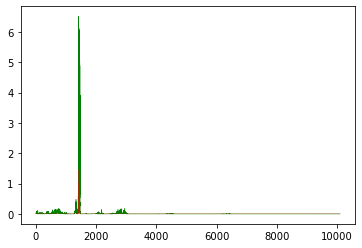

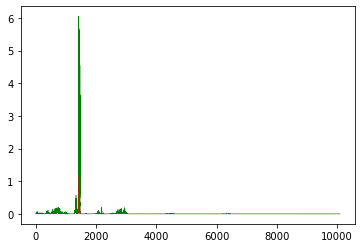

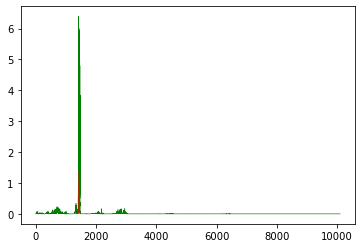

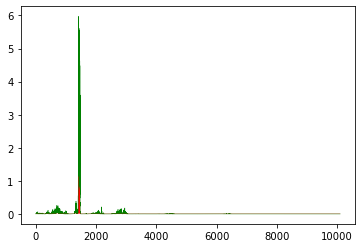

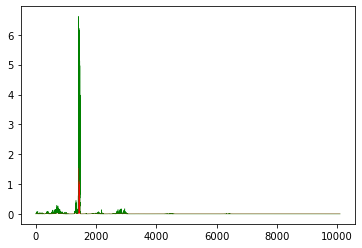

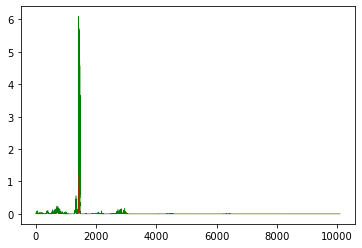

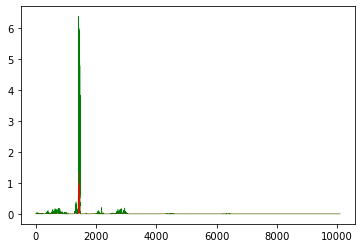

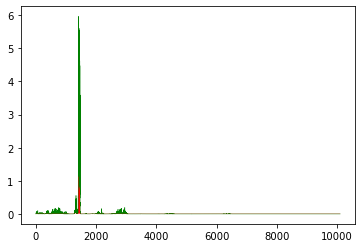

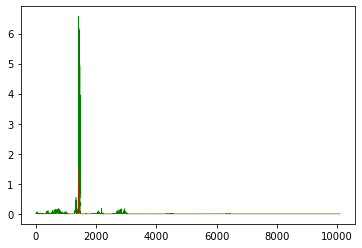

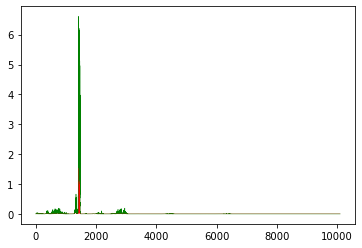

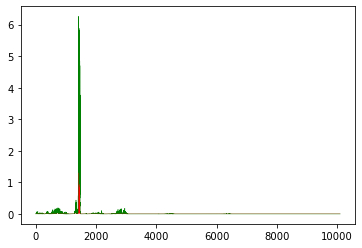

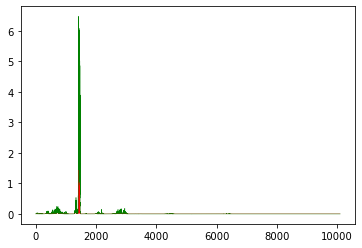

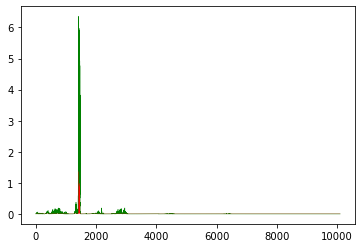

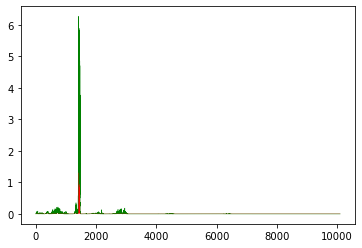

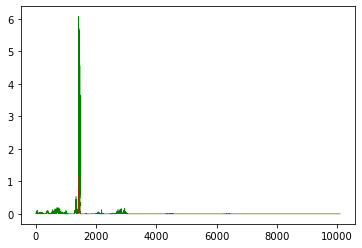

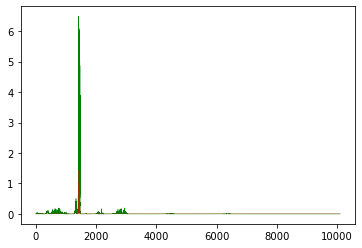

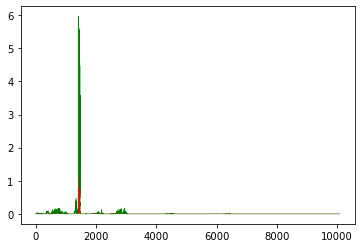

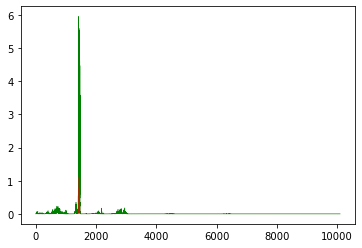

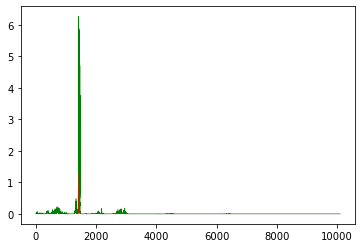

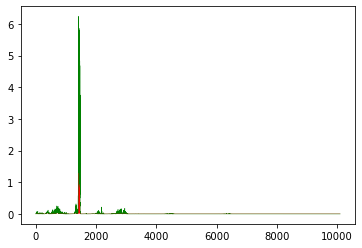

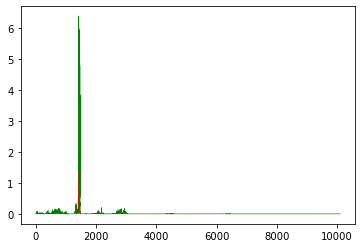

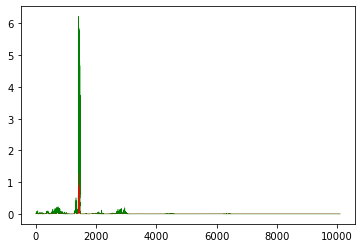

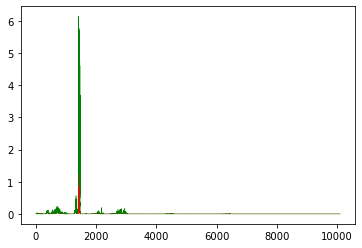

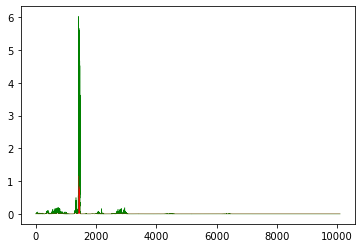

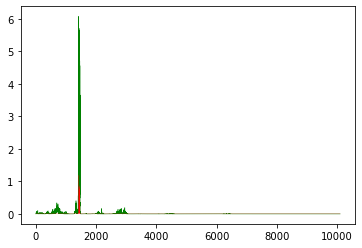

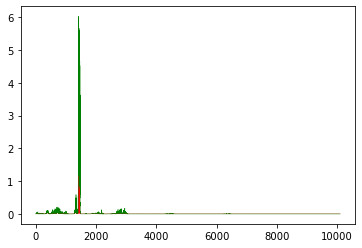

In [4]:
fig = plt.figure(figsize=(15, 7), dpi=100)
plt.ylabel('Absorption', fontsize=10)
plt.xlabel('Wavenumber / frequency / wavelength', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
window_size = 10
tau_p = 1
gamma = 0.1
lambda_p = 1

for spectrum in spectra:
    filtered_spectrum = np.zeros_like(spectrum)
    for i in range(0,np.size(spectrum)):
        if (i < window_size / 2) or (i > np.size(spectrum) - (window_size / 2)): 
            #print(i)
            filtered_spectrum[i] = spectrum[i]
        else:
            half_win = window_size // 2 
            kernel = ou_kernel(spectrum[i - half_win:i + half_win], gamma, lambda_p, tau_p)
            tmp_array = spectrum[i - half_win:i + half_win]
            filtered_spectrum[i - half_win:i + half_win] = np.convolve(tmp_array, kernel, 'same')
    plt.plot(spectrum,'green',linewidth=0.5)
    plt.plot(filtered_spectrum,'red',linewidth=0.2)
    plt.show()